In [52]:
import pandas as pd
from pykml.factory import KML_ElementMaker as KML
from lxml import etree
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [53]:
file_name = 'csv/jan.csv'

In [54]:
df = pd.read_csv(filepath_or_buffer=file_name, sep=';')

In [55]:
df.head()

,tipo,AHE,Número do cadastro,Número da portaria,Nome do usuário de água,CPF/CNPJ,Natureza da intervenção,Tipo da Fonte de Captação,Tipo de Intervenção,Classificação,...,Nº da licença,Nome do responsável técnico,CPF do responsável técnico,Formação do responsável técnico,Número da ART do responsável técnico,Nome da Geometria,Latitude,Longitude,Latitude (ponto final),Longitude (ponto final)
0,CGH,Arroio da Reserva,2017/028.651,-,SAULO SALLES BEVILACQUA NETO,007.341.510-39,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,...,-,Alexandre Bortolotto Tortato,020.391.189-00,Engenharia Civil,-,Ponto 1,-29.19,-53.35,-,-
1,CGH,Otto II,2018/027.627,-,ENERGETICA OTTO LTDA,18.352.510/0001-93,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,...,-,Marcos Coradi Favero,068.835.179-44,Engenharia Civil,-,Ponto no Barramento da CGH Otto II,-27.28,-52.96,-,-
2,NaN,Pé,2018/004.496,-,APS Construções EIRELI,24.538.491/0001-97,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,...,-,Jean Carlos Stahelin,029.659.619-17,Engenharia Elétrica,-,Ponto 1,-29.18,-51.07,-,-
3,CGH,Carapai,2018/004.498,-,APS Construções EIRELI,24.538.491/0001-97,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,...,-,Jean Carlos Stahelin,029.659.619-17,Engenharia Elétrica,-,Ponto 1,-29.18,-51.04,-,-
4,NaN,Capivari II,2018/031.421,-,"JCS Engenharia, Consultoria e Participações EI...",06.094.758/0001-12,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,...,-,Jean Carlos Stahelin,029.659.619-17,Engenharia Elétrica,-,Ponto 1,-30.46,-52.21,-,-


In [56]:
df.shape

(49, 57)

In [57]:
shp_path = "estados_2010.shp"

In [58]:
estados = geopandas.read_file(shp_path)

In [62]:
u_status = ['Concedida', 'Indeferida', 'Em análise', 'Aguardando análise', 'Aguardando alterações de dados inconsistentes']

In [63]:
pie_dict = {}
for s in u_status:
    ns = sum(df['Status'] == s)
    pie_dict[s] = ns

In [64]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

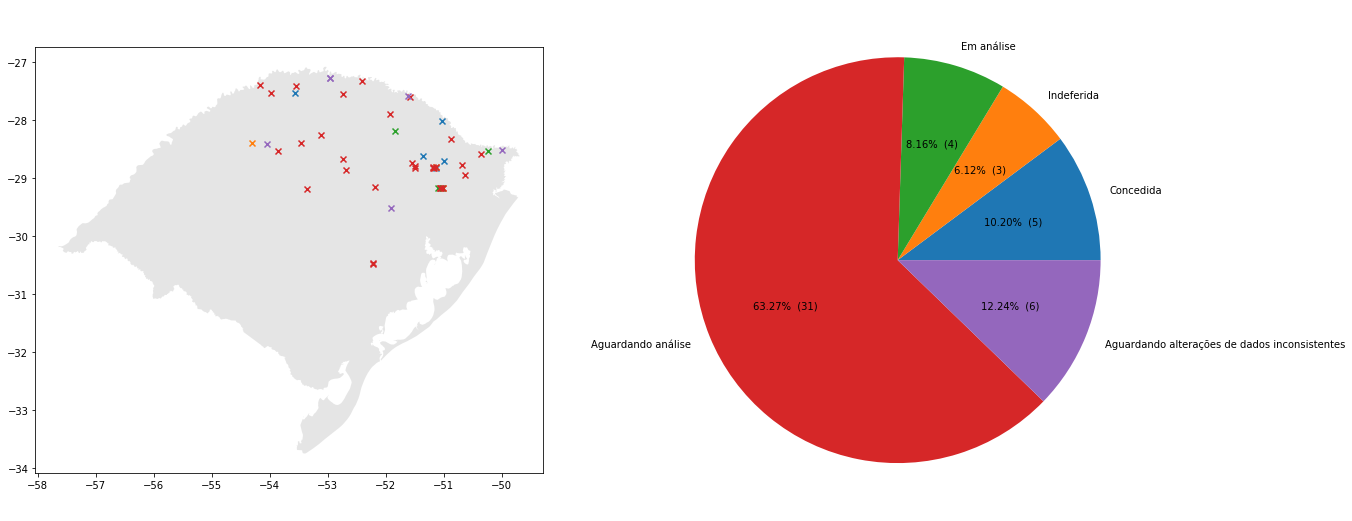

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
ax2.pie(pie_dict.values(), autopct=make_autopct(pie_dict.values()), labels=pie_dict.keys())
#plot_shape(22, ax1, sf)
estados[estados['sigla'] == 'RS'].plot(color='gray', ax=ax1, alpha=0.2)
#bacias.plot(edgecolor='black', color='gray', ax=ax1, alpha=0.1)
for s in u_status:
    f = df['Status'] == s
    y, x = df[f]['Latitude'].values, df[f]['Longitude'].values
    #x, y = [float(i.replace(',','.')) for i in x], [float(i.replace(',','.')) for i in y]
    ax1.scatter(x, y, label = s, marker='x')
ax1.axis('scaled')
#fig.suptitle('Processos em janeiro - Total {}'.format(df.shape[0]))
#ax2.legend(loc='upper right')
plt.savefig('01_Status_jan', bbox_inches='tight')